Naive Bayes Wine Data

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np


In [4]:
from sklearn import metrics

In [5]:
wine_df = pd.read_csv('wine.csv')
wine_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Wine,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic.acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid.phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [7]:
wine_df.rename(columns={'Acl': 'Alcalinity_of_Ash',
                        'Wine': 'Cultivator', 'Malic.acid' : 'Malic_acid'}, inplace=True)
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid.phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Observation:

In every attribute the mean and median are almost equal. 
But in Mg-- Q3(75%) and max varies in huge, so outliers are present in 'Mg' Column.

In [8]:
wine_df.columns

Index(['Cultivator', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_Ash', 'Mg',
       'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int',
       'Hue', 'OD', 'Proline'],
      dtype='object')

In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


No non-numerical columns in the dataset.

In [10]:
import seaborn as sns

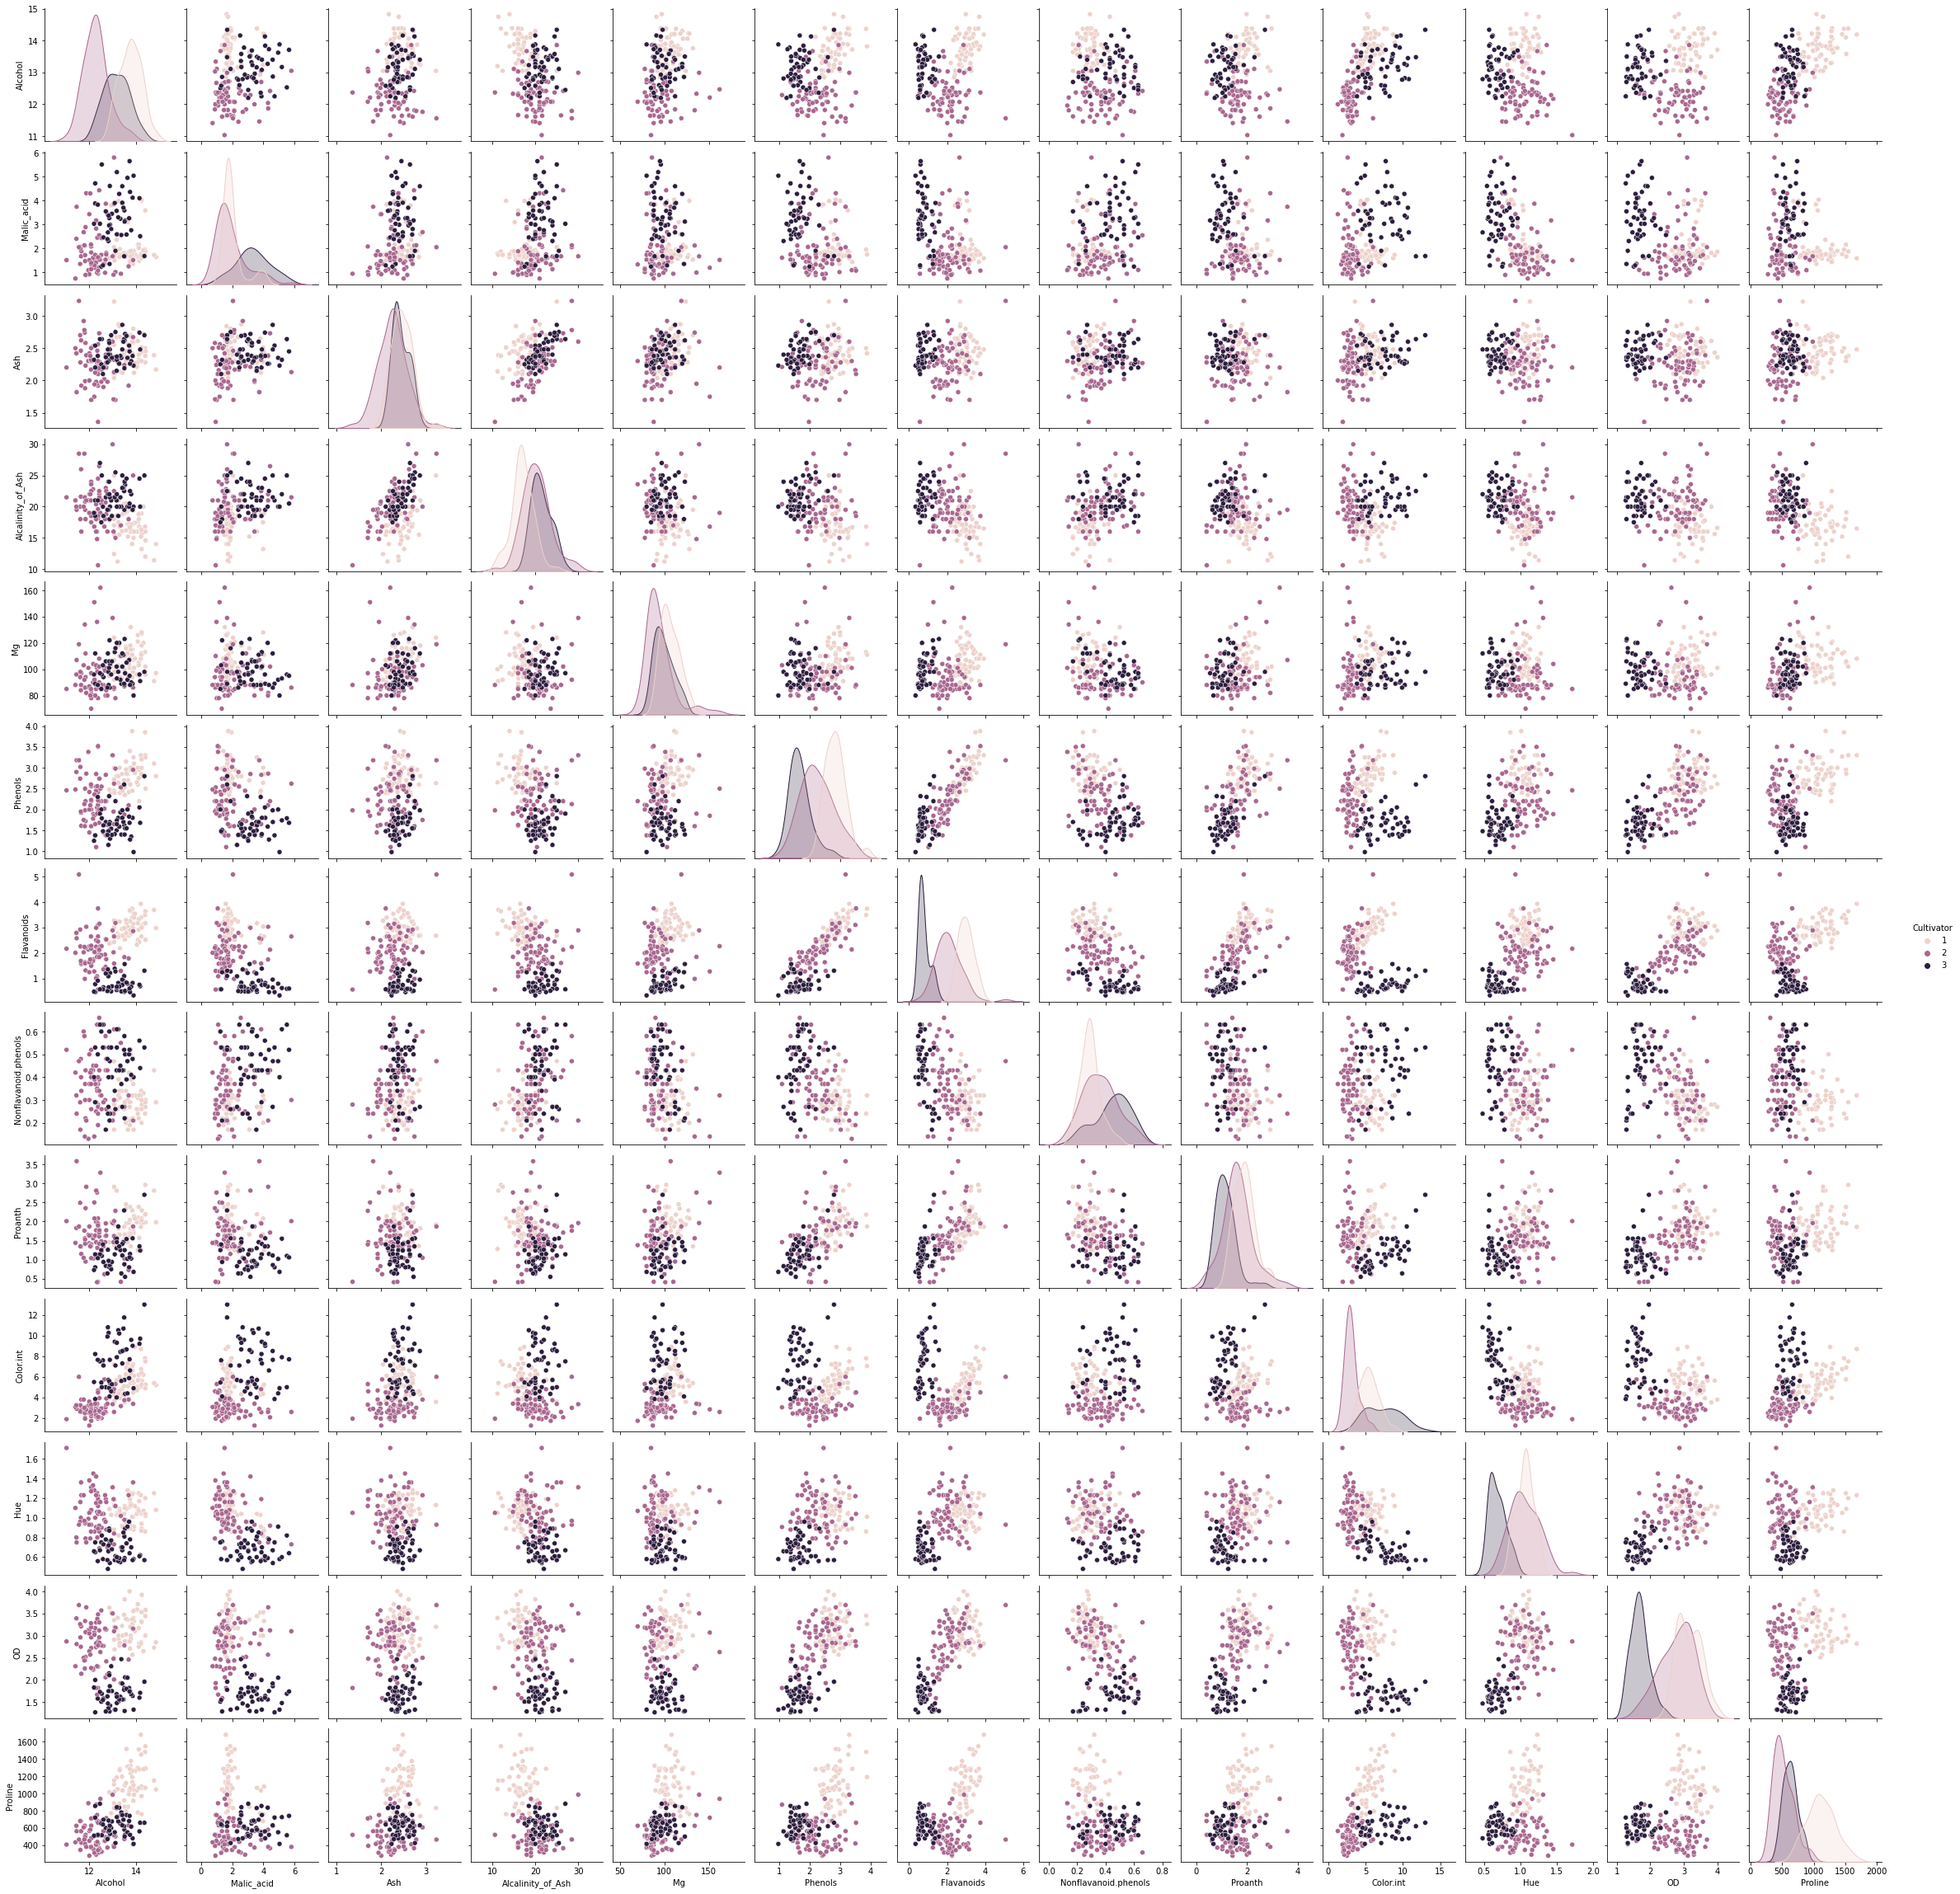

In [11]:
sns.pairplot(data=wine_df, diag_kind='kde', hue='Cultivator')

Splitting the data into training and test set for independent attributes

Target variable is "Cultivator".

train_set - X_train
train_labels - y_train

test_set - X_test
test_labels  - y_test

In [12]:
from sklearn.model_selection import train_test_split

X = wine_df.drop("Cultivator", axis=1)
y = wine_df.pop("Cultivator")

In [13]:
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_Ash,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.naive_bayes import GaussianNB

1.Invoking the NB Gaussian function to create the model.

2.Fitting the model in the training dataset. 

In [15]:
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB()

testing on the training dataset:

In [16]:
model.score(train_set, train_labels)

0.9758064516129032

Model on the test data:

In [17]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))


              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


 From the observation the recall- is 100% that is 1.00--
 1:1.00, 2:0.95, 3:1.00  
 
 Observation: eventhough the dimmensions are overlapping, we get the exact strong prediction score.
 

1. K- Fold  Cross Validation(cv) -- use this technique when the number of data points is less.

2. Take average of scores to get overall Average score.

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
from sklearn.model_selection import cross_val_predict

In [26]:
scores = cross_val_score(model, train_set, train_labels, cv=10)
print("Cross-validated-scores:", scores, scores)

print("AVERAGE score:", np.average(scores))

Cross-validated-scores: [1.         0.92307692 1.         1.         0.91666667 1.
 0.91666667 1.         1.         0.91666667] [1.         0.92307692 1.         1.         0.91666667 1.
 0.91666667 1.         1.         0.91666667]
AVERAGE score: 0.9673076923076922


96% - Average Accuracy Score, I can expect from this model on this Dataset